In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.fingerprinter import Fingerprinter
from utils.visualization import plot_regression_histograms

import torch
from utils.mlp import MLP

%load_ext autoreload
%autoreload 2

## Datasets

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
properties = train.columns[1:]

In [3]:
fingerprinter = Fingerprinter()

train_X = fingerprinter(train['SMILES'].tolist())
test_X = fingerprinter(test['SMILES'].tolist())

n_features = train_X.shape[1]
print(f'Fingerprints have {n_features} features')

Fingerprints have 2048 features


## MLP Model

In [4]:
params = dict(
    depth=4, 
    width=512, 
    dropout=0.8, 
    lr=0.001, 
    weight_decay=0.0
)

mlp_dict = {property_label : MLP(n_features=n_features, **params)
            for property_label in properties}

In [5]:
for property_label, mlp in mlp_dict.items():

    print(f'Training MLP for {property_label}...', end='')
    
    train_Y = train[property_label]
    loss = mlp.fit(train_X, train_Y)

    print('Done (Loss = {:.5f})'.format(loss))

Training MLP for Viability_Mask_1...Done (Loss = 0.11558)
Training MLP for Viability_Mask_2...Done (Loss = 0.13095)
Training MLP for LPS_Abs...Done (Loss = 0.16958)
Training MLP for LPS_Lum...Done (Loss = 0.30551)
Training MLP for MPLA_Abs...Done (Loss = 0.21965)
Training MLP for MPLA_Lum...Done (Loss = 0.15580)
Training MLP for CpG_Abs...Done (Loss = 0.15092)
Training MLP for cGAMP_Abs...Done (Loss = 0.15950)
Training MLP for cGAMP_Lum...Done (Loss = 0.19304)
Training MLP for LMCpG_Abs...Done (Loss = 0.17618)
Training MLP for LMcGAMP_Lum...Done (Loss = 0.17911)


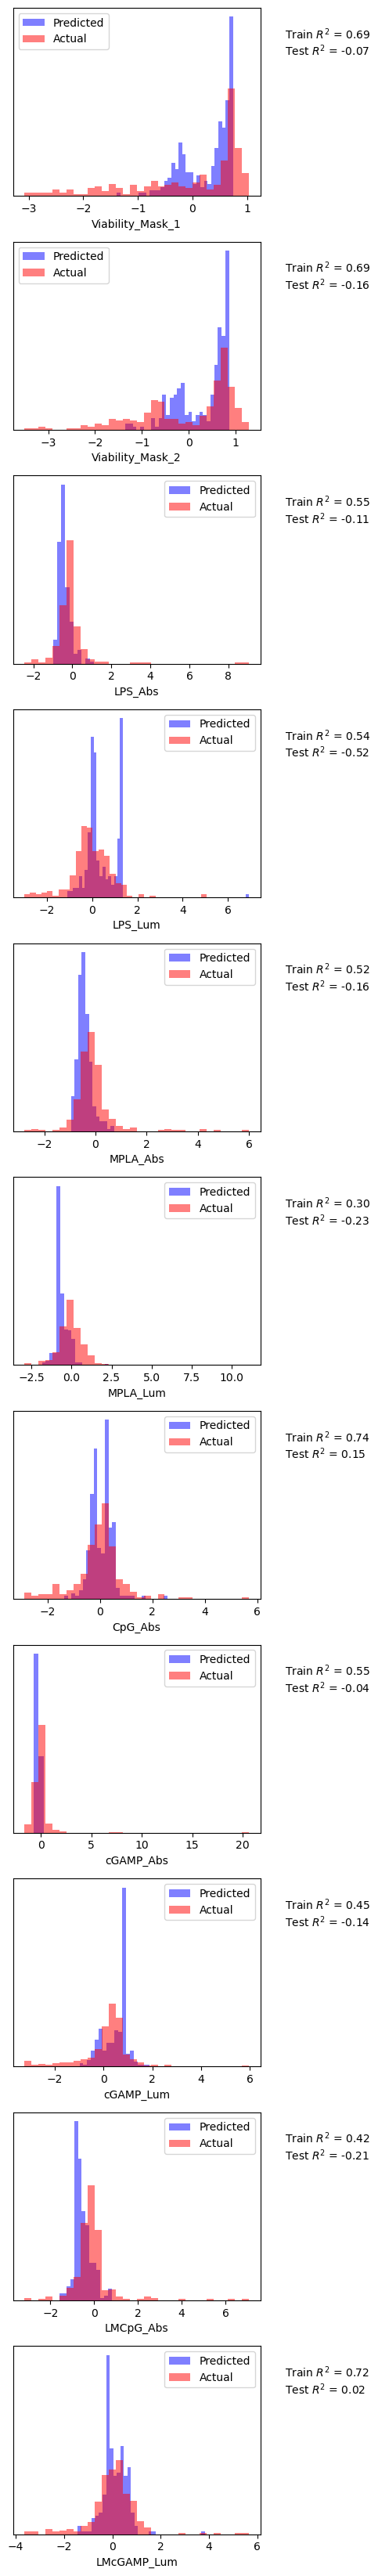

In [6]:
plot_regression_histograms(mlp_dict, train_X, test_X, test, train)